# Ensemble Learning - Voting

TP:  108 
FP:  0 
FN:  0 
TN:  45
VotingClassifier 
Ensemble accuracy:  1.0 
Ensemble precision:  1.0 
Ensemble recall:  1.0 
Ensemble specificity:  1.0 
Ensemble misclassification:  0.0
Ensemble AUC:  1.0


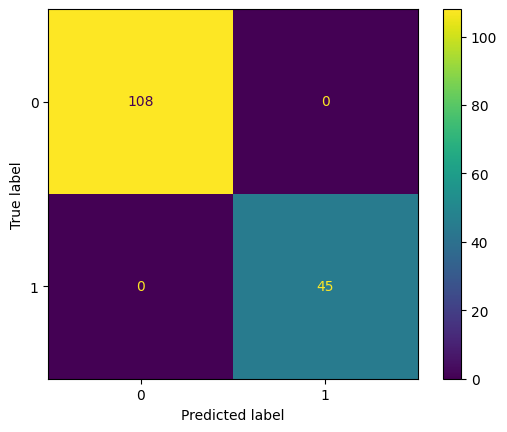

In [1]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

# split score_df
score_df = pd.read_csv("score.csv")
X = pd.get_dummies(score_df[[
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
        'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']])
Y = score_df['target'].map({'NO':0,'YES':1}) # convert to 0, 1 for AUC calculation

#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.25, random_state=50)

# feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)                     
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Voting-based Ensemble for Classification using various methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models using LogisticRegression, DecisionTree, and SupportVector
estimators = []
model1 = LogisticRegression(random_state=7)  # Logistic Regression Classifier
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=7) # Decision Tree Classifier
estimators.append(('cart', model2))
model3 = SVC(random_state=7) #Support Vector Classifier
estimators.append(('svc', model3))

# create the ensemble model
es_Vote = VotingClassifier(estimators)
es_Vote.fit(X_train, Y_train)
y_predict_en = es_Vote.predict(X_test)      

# Model performance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Confusion Matrix
cm_en=confusion_matrix(Y_test, y_predict_en, labels=es_Vote.classes_)
en_TP = cm_en[0][0]
en_FP = cm_en[0][1]
en_FN = cm_en[1][0]
en_TN = cm_en[1][1]

print("TP: ", en_TP, '\nFP: ', en_FP, '\nFN: ', en_FN, '\nTN: ', en_TN)
print(es_Vote.__class__.__name__, 
      '\nEnsemble accuracy: ', accuracy_score(Y_test, y_predict_en),
      '\nEnsemble precision: ',precision_score(Y_test, y_predict_en), #TP/(TP+FP),
      '\nEnsemble recall: ', recall_score(Y_test, y_predict_en) , #TP/(TP+FN),
      '\nEnsemble specificity: ', en_TN/(en_TN+en_FP),
      '\nEnsemble misclassification: ', 1-accuracy_score(Y_test, y_predict_en)
      )

en_matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm_en, 
    display_labels=es_Vote.classes_)
en_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

en_auc = roc_auc_score(Y_test, y_predict_en)
print("Ensemble AUC: ", en_auc)

# KNN


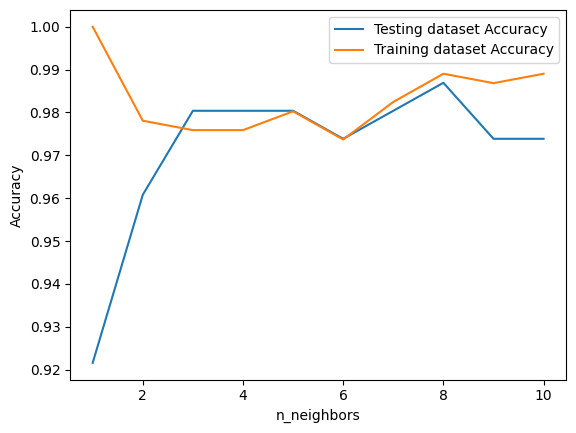

KNeighborsClassifier 
KNN accuracy:  0.9869 
KNN precision:  0.9778 
KNN recall:  0.9778 
KNN specificity:  0.9778 
KNN misclassification:  0.0131
KNN AUC:  0.9843


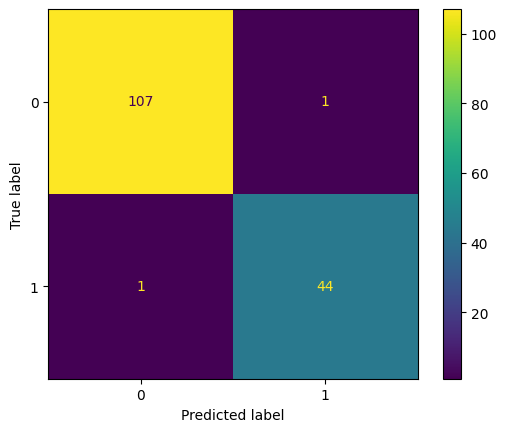

In [2]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

# split score_df
score_df = pd.read_csv("score.csv")
X = pd.get_dummies(score_df[[
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
        'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']])
Y = score_df['target'].map({'NO':0,'YES':1}) # convert to 0, 1 for AUC calculation

#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.25, random_state=50)

# feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)                     
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Import necessary modules 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Trial - find out which k-value is the best
neighbors = np.arange(1, 11) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test)
    
plt.plot(neighbors, 
         test_accuracy, 
         label = 'Testing dataset Accuracy') 
plt.plot(neighbors, 
         train_accuracy, 
         label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

# use k = 8
knn = KNeighborsClassifier(n_neighbors=8) 
knn.fit(X_train, Y_train) 

y_predict_knn = knn.predict(X_test)
knn.score(X_test, Y_test)

cm_knn = confusion_matrix(Y_test, y_predict_knn)
knn_TP = cm_knn[0][0]
knn_FP = cm_knn[0][1]
knn_FN = cm_knn[1][0]
knn_TN = cm_knn[1][1]

print(knn.__class__.__name__, 
      '\nKNN accuracy: ', round(accuracy_score(Y_test, y_predict_knn), 4),
      '\nKNN precision: ',round(precision_score(Y_test, y_predict_knn),4), # TP/(TP+FP),
      '\nKNN recall: ', round(recall_score(Y_test, y_predict_knn), 4), # TP/(TP+FN),
      '\nKNN specificity: ', round(knn_TN/(knn_TN+knn_FP), 4),
      '\nKNN misclassification: ', round(1-accuracy_score(Y_test, y_predict_knn), 4)
      )

knn_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
knn_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

knn_auc = roc_auc_score(Y_test, y_predict_knn)
print("KNN AUC: ", round(knn_auc, 4))


# Random Forest Classifier

TP:  108 
FP:  0 
FN:  0 
TN:  45
RandomForestClassifier 
Random Forest accuracy:  1.0 
Random Forest precision:  1.0 
Random Forest recall:  1.0 
Random Forest specificity:  1.0 
Random Forest misclassification:  0.0
Random Forest AUC:  1.0


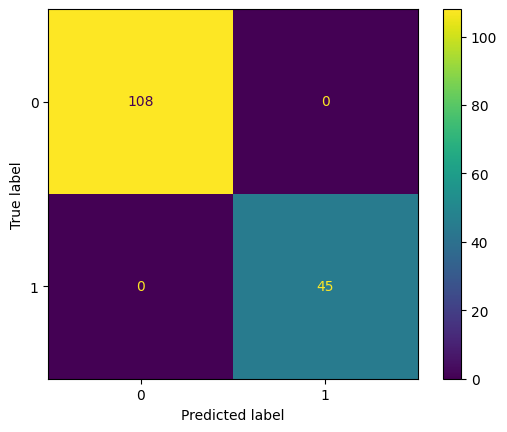

In [6]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

# split score_df
score_df = pd.read_csv("score.csv")
X = pd.get_dummies(score_df[[
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
        'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']])
Y = score_df['target'].map({'NO':0,'YES':1}) # convert to 0, 1 for AUC calculation

#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.25, random_state=50)

# feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)                     
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

y_predict_rf = rf.predict(X_test)

cm_rf = confusion_matrix(Y_test, y_predict_rf)
rf_TP = cm_rf[0][0]
rf_FP = cm_rf[0][1]
rf_FN = cm_rf[1][0]
rf_TN = cm_rf[1][1]

print("TP: ", rf_TP, '\nFP: ', rf_FP, '\nFN: ', rf_FN, '\nTN: ', rf_TN)
print(rf.__class__.__name__, 
      '\nRandom Forest accuracy: ', round(accuracy_score(Y_test, y_predict_rf), 4),
      '\nRandom Forest precision: ',round(precision_score(Y_test, y_predict_rf),4), # TP/(TP+FP),
      '\nRandom Forest recall: ', round(recall_score(Y_test, y_predict_rf), 4), # TP/(TP+FN),
      '\nRandom Forest specificity: ', round(rf_TN/(rf_TN+rf_FP), 4),
      '\nRandom Forest misclassification: ', round(1-accuracy_score(Y_test, y_predict_rf), 4)
      )

rf_matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf, 
    display_labels=rf.classes_)
rf_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf_auc = roc_auc_score(Y_test, y_predict_rf)
print("Random Forest AUC: ", round(rf_auc, 4))

# Logistic Regression

intercept: [-3.8287]
    Attribute Coefficient
0    A1_Score        0.98
1    A2_Score        1.05
2    A3_Score        0.81
3    A4_Score        1.03
4    A5_Score        1.11
5    A6_Score         1.0
6    A7_Score        1.08
7    A8_Score        0.95
8    A9_Score        1.09
9   A10_Score        0.75
10        sum        1.88
LogisticRegression 
Logistic Regression accuracy:  1.0 
Logistic Regression precision:  1.0 
Logistic Regression recall:  1.0 
Logistic Regression specificity:  1.0 
Logistic Regression misclassification:  0.0
Logistic Regression AUC:  1.0


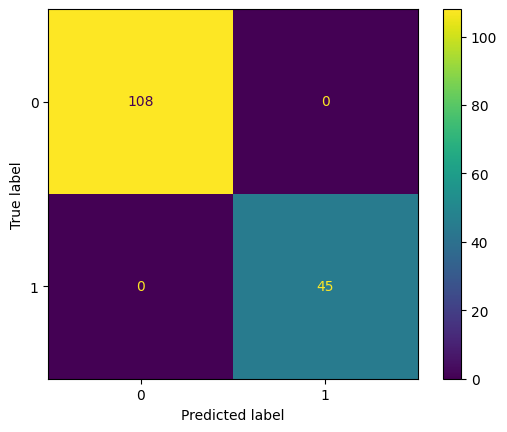

In [4]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

# split score_df
score_df = pd.read_csv("score.csv")
X = pd.get_dummies(score_df[[
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
        'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']])
Y = score_df['target'].map({'NO':0,'YES':1}) # convert to 0, 1 for AUC calculation

#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.25, random_state=50)

# feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)                     
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear', random_state=50, max_iter=300)
lg.fit(X_train, Y_train)

# obtain the model intercept and coefficient of each input attribute
print(f"intercept: {np.round(lg.intercept_,4)}")
fieldList = np.array(list(X)).reshape(-1,1)
coeffs = np.reshape(np.round(lg.coef_,2),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Attribute','Coefficient']))

# fit the model to compare predicted and actual target output values
y_predict_lg = lg.predict(X_test)      

# Model perfomance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm_lg = confusion_matrix(Y_test, y_predict_rf)
lg_TP = cm_lg[0][0]
lg_FP = cm_lg[0][1]
lg_FN = cm_lg[1][0]
lg_TN = cm_lg[1][1]

print(lg.__class__.__name__, 
      '\nLogistic Regression accuracy: ', round(accuracy_score(Y_test, y_predict_lg), 4),
      '\nLogistic Regression precision: ',round(precision_score(Y_test, y_predict_lg),4), # TP/(TP+FP),
      '\nLogistic Regression recall: ', round(recall_score(Y_test, y_predict_lg), 4), # TP/(TP+FN),
      '\nLogistic Regression specificity: ', round(lg_TN/(lg_TN+lg_FP), 4),
      '\nLogistic Regression misclassification: ', round(1-accuracy_score(Y_test, y_predict_lg), 4)
      )

lg_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_lg, display_labels=lg.classes_)
lg_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lg_auc = roc_auc_score(Y_test, y_predict_lg)
print("Logistic Regression AUC: ", round(lg_auc, 4))


# ROC

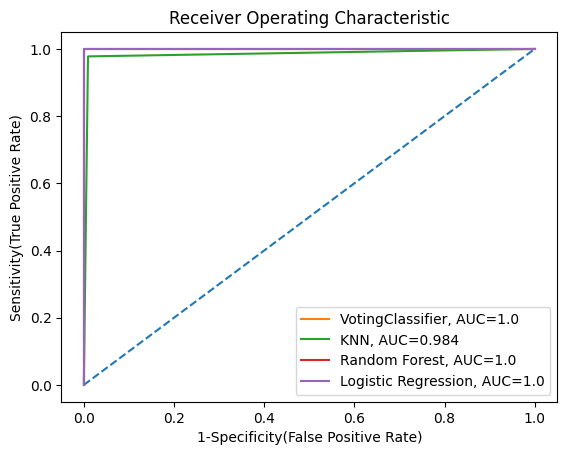

In [7]:
# apply models for predictions
y_predict_en
y_predict_knn
y_predict_rf
y_predict_lg

# derive ROC AUC scores of each model
en_auc
knn_auc
rf_auc
lg_auc

# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit Ensemble Learning - VotingClassifier and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_en)
plt.plot(fpr,tpr,label="VotingClassifier, AUC="+str(round(en_auc,3)))

#fit KNN model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_knn)
plt.plot(fpr,tpr,label="KNN, AUC="+str(round(knn_auc,3)))

#fit Random Forest model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_rf)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(round(rf_auc,3)))

#fit Logistic Regression model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_lg)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(round(lg_auc,3)))

#add legend information
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()